In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

### Data Loader

In [6]:
cancer = load_breast_cancer()

### Data Shupple, Model Generator, Training

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### 정확도

In [15]:
# Overfitting,

print('훈련세트 정확도 : {:3f}'.format(model.score(X_train, y_train)))
print('훈련세트 정확도 : {:3f}'.format(model.score(X_test, y_test)))

훈련세트 정확도 : 0.995305
훈련세트 정확도 : 0.951049


### 가지치기

In [16]:
model = DecisionTreeClassifier(max_depth=4, random_state=0)
model.fit(X_train, y_train)

print('훈련세트 정확도 : {:3f}'.format(model.score(X_train, y_train)))
print('훈련세트 정확도 : {:3f}'.format(model.score(X_test, y_test)))

훈련세트 정확도 : 0.995305
훈련세트 정확도 : 0.951049


### 특성중요도

In [14]:
print('특성중요도:\n{}'.format(model.feature_importances_))

특성중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.73943775 0.         0.         0.013032   0.
 0.         0.         0.         0.         0.         0.01737208
 0.00684355 0.         0.06019401 0.11783988 0.         0.03522339
 0.01005736 0.         0.         0.         0.         0.        ]


In [17]:
import matplotlib.pyplot as plt
import numpy as np

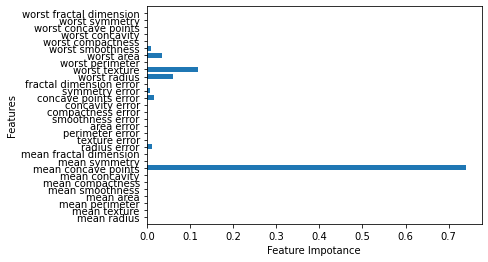

In [19]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel('Feature Impotance')
    plt.ylabel('Features')
    plt.ylim(-1, n_features) # 그림의 범위를 수동으로 지정할때
    
plot_feature_importances_cancer(model)


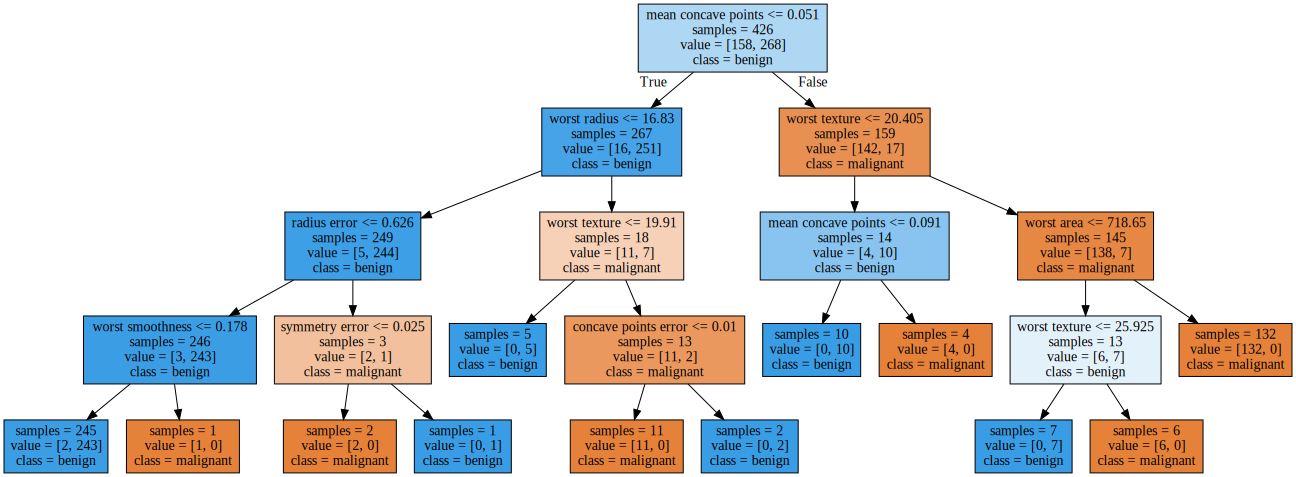

'cancer_tree.png.pdf'

In [20]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='cancer_tree.dot',
                class_names=cancer.target_names,
                feature_names=cancer.feature_names,
                impurity=False,
                filled = True) 

with open('cancer_tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
display(dot)
dot.render(filename='cancer_tree.png')